In [10]:
import astropy.units as u
from specutils import Spectrum
import os
import numpy as np
import matplotlib.pyplot as plt

In [11]:
file_fire = "/Users/guanying/SIMPLE_Archive/SIMPLE-db/scripts/spectra_convert/BONES Archive/BONES SPECTRA/FIRE_1013m7246.txt"

This notebook is to mask the region for FIRE instrument that is in different file format and mask region

Processing FIRE_1013m7246.txt...


Text(0, 0.5, 'Flux (erg / cm^2 / s / um)')

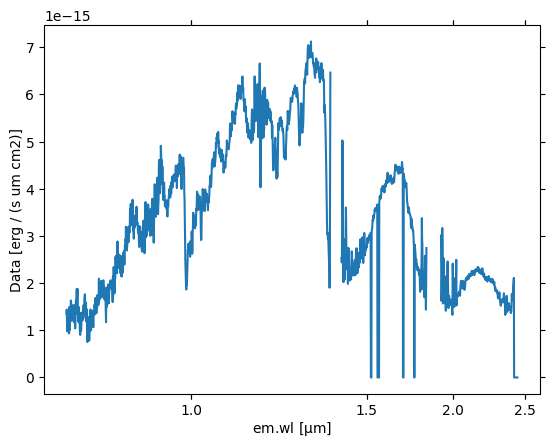

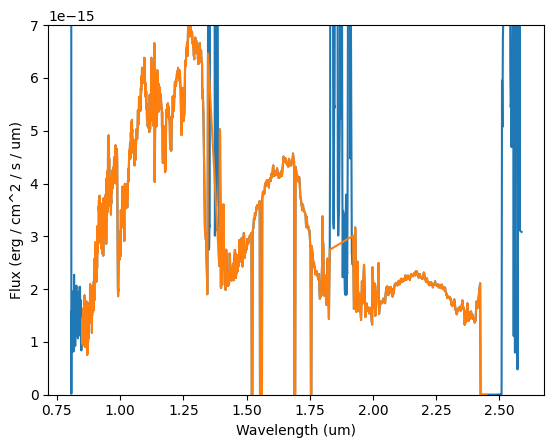

In [12]:
file_fire = "/Users/guanying/SIMPLE_Archive/SIMPLE-db/scripts/spectra_convert/BONES Archive/BONES SPECTRA/FIRE_1013m7246.txt"
data = np.loadtxt(file_fire, comments="#")
print(f"Processing {os.path.basename(file_fire)}...")

wavelength = data[:, 0] * u.um
flux = data[:, 1] * (u.erg / u.cm**2 / u.s / u.um)

# 0.85-1.348;1.39-1.83;1.92-2.5
mask = (
    ((1.348 < wavelength.value) & (wavelength.value < 1.39)) |
    ((1.83  < wavelength.value) & (wavelength.value < 1.92)) |
    (wavelength.value > 2.45) |
    (wavelength.value < 0.85)
)

# # Create Spectrum object with uncertainty
spectrum = Spectrum(
    flux=flux,
    spectral_axis=wavelength,
    mask=mask
)

spectrum.plot()
ax = plt.subplots()[1]
ax.plot(spectrum.spectral_axis, spectrum.flux)
ax.plot(spectrum.spectral_axis[~spectrum.mask], spectrum.flux[~spectrum.mask])
ax.set_ylim(0, 7e-15)
ax.set_xlabel('Wavelength (um)')
ax.set_ylabel('Flux (erg / cm^2 / s / um)')


Text(0, 0.5, 'Flux (erg / cm^2 / s / um)')

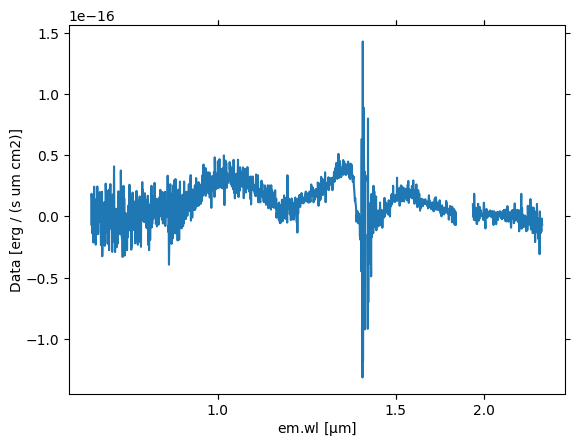

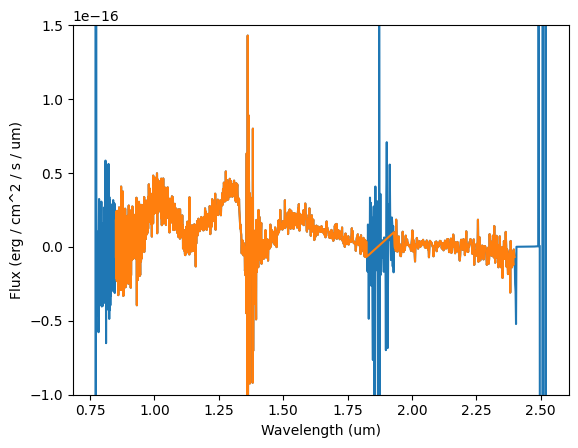

In [13]:
from specutils import Spectrum
from specutils.manipulation import snr_threshold
from astropy.nddata import StdDevUncertainty
import astropy.units as u
from astrodb_utils.spectra import check_spectrum_plottable

file_fire ="/Users/guanying/SIMPLE_Archive/SIMPLE-db/scripts/spectra_convert/BONES Archive/BONES SPECTRA/fireprism_NIR_J0414-5854.csv"
data = np.genfromtxt(file_fire, delimiter=",", skip_header=1)
#WISEA J041451.67−585456.7

wavelength = data[:, 0] * u.um
flux = data[:, 1] * (u.erg / u.cm**2 / u.s / u.um)

mask = (
    (wavelength.value < 0.85) |
    ((wavelength.value > 1.374) & (wavelength.value < 1.38)) |
    ((wavelength.value > 1.825) & (wavelength.value < 1.93)) |
    (wavelength.value > 2.4)
)
spectrum = Spectrum(
    flux=flux,
    spectral_axis=wavelength,
    mask=mask
)

spectrum.plot()
ax = plt.subplots()[1]
ax.plot(spectrum.spectral_axis, spectrum.flux)
ax.plot(spectrum.spectral_axis[~spectrum.mask], spectrum.flux[~spectrum.mask])
ax.set_ylim(-1e-16, 1.5e-16)
ax.set_xlabel('Wavelength (um)')
ax.set_ylabel('Flux (erg / cm^2 / s / um)')



Reading fireprism_NIR_ULASJ124947.04+095019.8.txt...


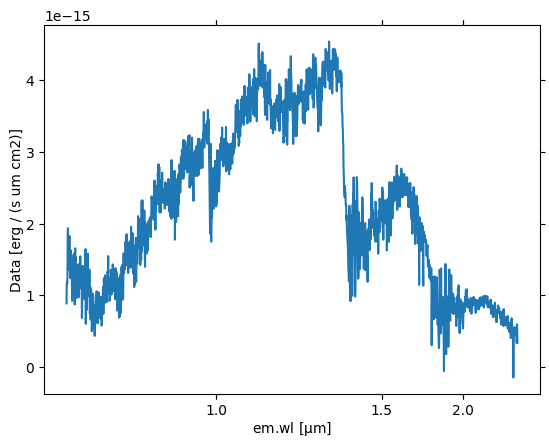

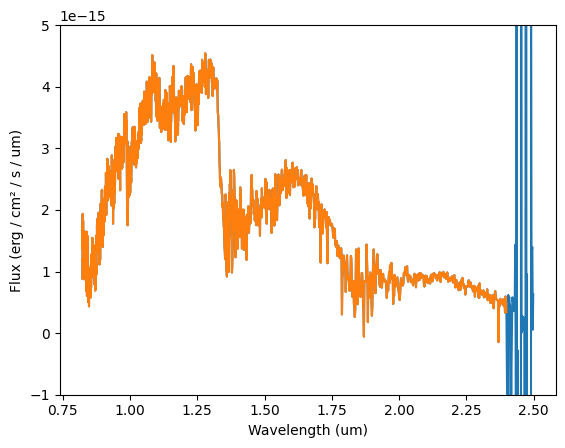

Reading fireprism_NIR_ULASJ133836.97-022910.7.txt...


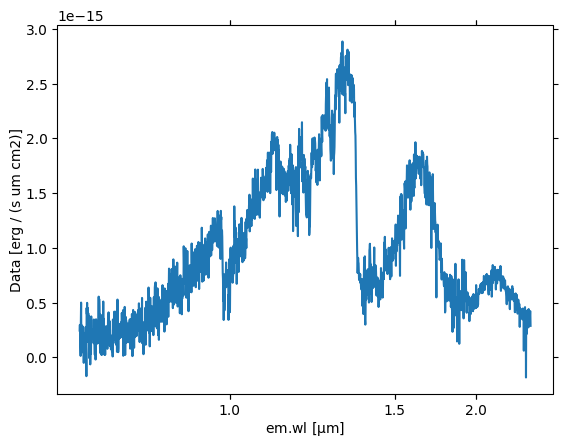

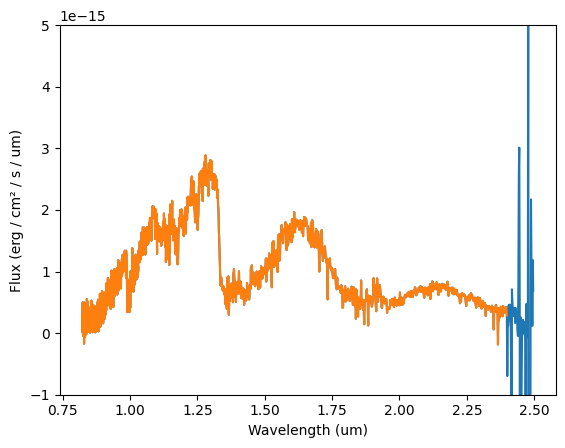

In [14]:
# Handle Fire prism with txt file
"""  Process source with DSpec spectra
Read the data on 3 columns:
#1: wavelength      #2: flux        #3: uncertainty
# """
files = [
    "/Users/guanying/SIMPLE_Archive/SIMPLE-db/scripts/spectra_convert/BONES Archive/BONES SPECTRA/fireprism_NIR_ULASJ124947.04+095019.8.txt",
    "/Users/guanying/SIMPLE_Archive/SIMPLE-db/scripts/spectra_convert/BONES Archive/BONES SPECTRA/fireprism_NIR_ULASJ133836.97-022910.7.txt"
]

for file in files:
    print(f"Reading {os.path.basename(file)}...")
    data = np.loadtxt(file, comments="#", skiprows=12)

    wavelength = data[:, 0] * u.um
    flux = data[:, 1] * (u.erg / u.cm**2 / u.s / u.um)

    mask = np.logical_or(wavelength.value < 0, wavelength.value > 2.4)

    # Create Spectrum object
    spectrum = Spectrum(
        flux=flux,
        spectral_axis=wavelength,
        mask=mask
    )
    spectrum.plot()

    # Create a new figure for this spectrum
    fig, ax = plt.subplots()
    ax.plot(spectrum.spectral_axis, spectrum.flux)
    ax.plot(spectrum.spectral_axis[~spectrum.mask], spectrum.flux[~spectrum.mask])

    ax.set_ylim(-1e-15, 5e-15)
    ax.set_xlabel("Wavelength (um)")
    ax.set_ylabel("Flux (erg / cm² / s / um)")
    plt.show()
